In [1]:
import pandas as pd
df = pd.read_csv('amazon_noutbuklar.csv')
df.head()

,brand,model,screen_size,ram,storage,cpu_model,operating_system,price,rating,review_count,graphic
0,Lenovo,IdeaPad Slim 5,14 Inches,16 GB,1 TB,Snapdragon,‎Windows 11 Home,74990.0,5.0,1,Integrated
1,Lenovo,IdeaPad,14 Inches,NaN,512 GB,Intel Core i5,‎Windows 11 Home,52390.0,3.9,488,Integrated
2,HP,HP 255,15.6 Inches,8 GB,512 GB,Ryzen 5,‎DOS,29990.0,3.4,18,Integrated
3,Lenovo,Lenovo V15 G4,15.6 Inches,16 GB,512 GB,Ryzen 7,‎Windows 11,39990.0,4.0,89,Integrated
4,Lenovo,Lenovo V15,15.6 Inches,16 GB,512 GB,Core i7-1255U,‎Windows 11 Home,48490.0,3.4,12,Integrated


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             100 non-null    object 
 1   model             100 non-null    object 
 2   screen_size       100 non-null    float64
 3   ram               100 non-null    int64  
 4   storage           100 non-null    int64  
 5   cpu_model         100 non-null    object 
 6   operating_system  100 non-null    object 
 7   price             100 non-null    float64
 8   rating            100 non-null    float64
 9   review_count      100 non-null    int64  
 10  graphic           100 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 8.7+ KB


In [42]:
df.isnull().sum()

brand               0
model               0
screen_size         0
ram                 0
storage             0
cpu_model           0
operating_system    0
price               0
rating              0
review_count        0
graphic             0
dtype: int64

In [57]:
df['graphic'].value_counts()

graphic
Integrated    82
Dedicated     18
Name: count, dtype: int64

In [56]:
df['graphic']=df['graphic'].replace(['No graphic'], 'Integrated')

In [12]:
def convert_to_inches(value):
    if 'Inches' in value:
        return float(value.replace('Inches', '').strip())
    elif 'Centimetres' in value:
        cm = float(value.replace('Centimetres', '').strip())
        return cm / 2.54
    elif 'No screen size' in value:
        return 0
    else:
        return float(value)
df['screen_size'] = df['screen_size'].apply(convert_to_inches)

In [41]:
df['cpu_model'] = df['cpu_model'].fillna("Intel Core i5")

In [22]:
df['ram'] =df['ram'].str.replace('GB', '').str.strip().astype(int)

In [33]:
def convert_storage(value):
    if 'TB' in value:
        return int(value.replace('TB', '').strip()) * 1024
    elif 'GB' in value:
        return float(value.replace('GB', '').strip())
    else:
        return 0
df['storage'] = df['storage'].apply(convert_storage)

In [53]:
df['review_coun'] = df['review_count'].apply(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             100 non-null    object 
 1   model             100 non-null    object 
 2   screen_size       100 non-null    float64
 3   ram               100 non-null    int64  
 4   storage           100 non-null    int64  
 5   cpu_model         100 non-null    object 
 6   operating_system  100 non-null    object 
 7   price             100 non-null    float64
 8   rating            100 non-null    float64
 9   review_count      100 non-null    int64  
 10  graphic           100 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 8.7+ KB


In [60]:
df.to_csv('cleaned_data.csv', index=False)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             100 non-null    object 
 1   model             100 non-null    object 
 2   screen_size       100 non-null    float64
 3   ram               100 non-null    int64  
 4   storage           100 non-null    int64  
 5   cpu_model         100 non-null    object 
 6   operating_system  100 non-null    object 
 7   price             100 non-null    float64
 8   rating            100 non-null    float64
 9   review_count      100 non-null    int64  
 10  graphic           100 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 8.7+ KB


In [63]:
import matplotlib.pyplot as plt

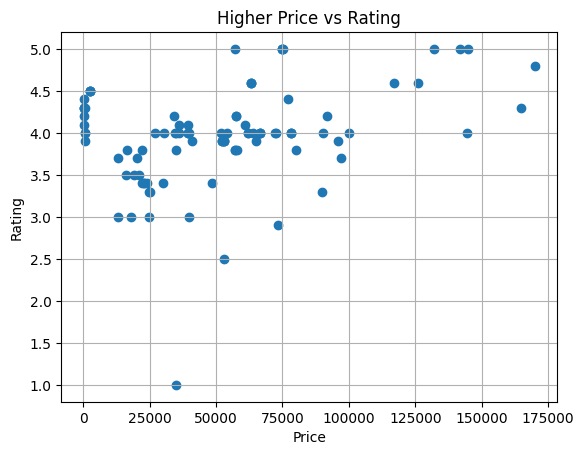

In [64]:
plt.scatter(df['price'], df['rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Higher Price vs Rating')
plt.grid()
plt.show()


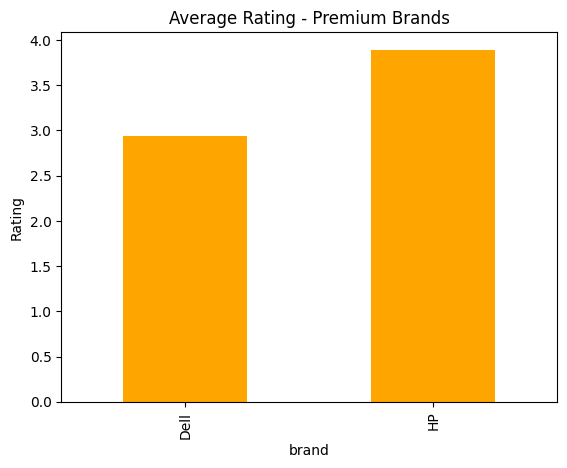

In [65]:
premium = df[df['brand'].isin(['HP', 'Dell'])]
premium.groupby('brand')['rating'].mean().plot(kind='bar', color='orange')
plt.title('Average Rating - Premium Brands')
plt.ylabel('Rating')
plt.show()


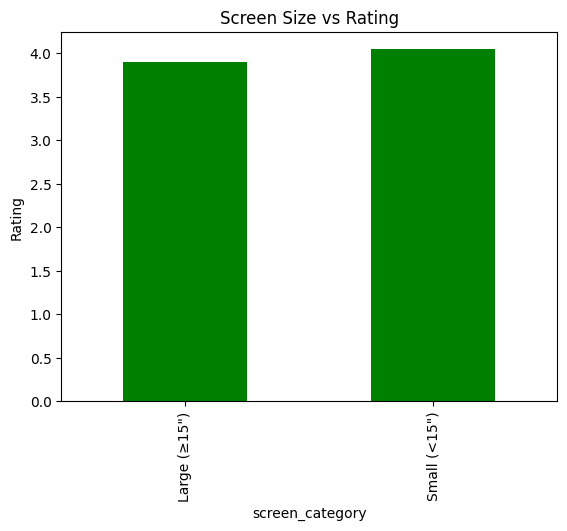

In [66]:
df['screen_category'] = df['screen_size'].apply(lambda x: 'Large (≥15")' if x >= 15 else 'Small (<15")')
df.groupby('screen_category')['rating'].mean().plot(kind='bar', color='green')
plt.title('Screen Size vs Rating')
plt.ylabel('Rating')
plt.show()


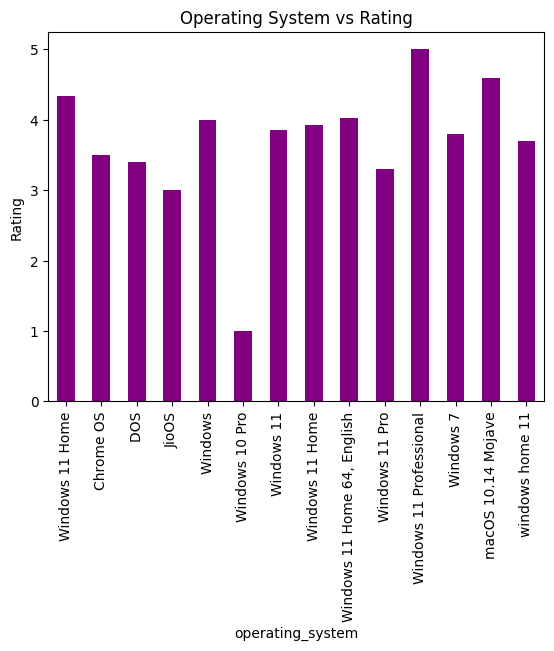

In [67]:
df.groupby('operating_system')['rating'].mean().plot(kind='bar', color='purple')
plt.title('Operating System vs Rating')
plt.ylabel('Rating')
plt.show()


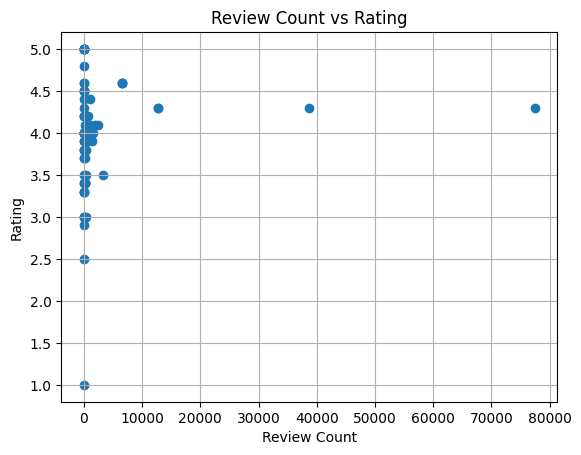

In [68]:
plt.scatter(df['review_count'], df['rating'])
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.title('Review Count vs Rating')
plt.grid()
plt.show()


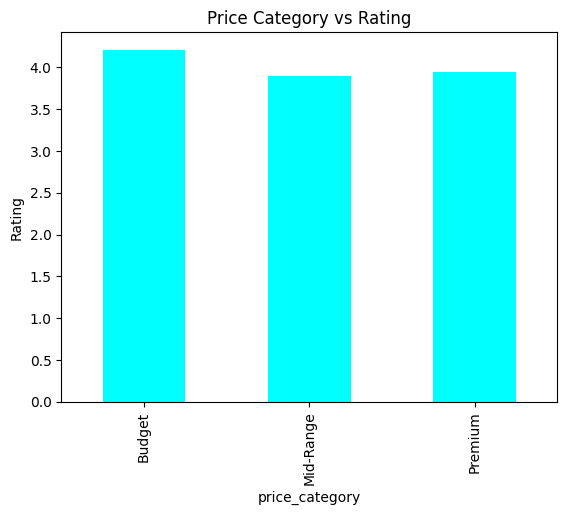

In [69]:
def price_category(x):
    if x < 500:
        return 'Budget'
    elif x <= 800:
        return 'Mid-Range'
    else:
        return 'Premium'

df['price_category'] = df['price'].apply(price_category)

df.groupby('price_category')['rating'].mean().plot(kind='bar', color='cyan')
plt.title('Price Category vs Rating')
plt.ylabel('Rating')
plt.show()


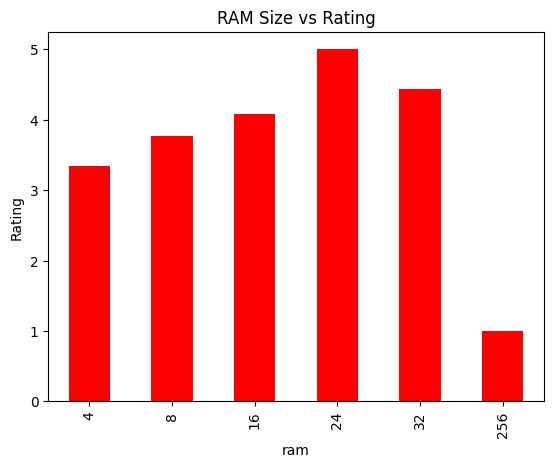

In [70]:
df.groupby('ram')['rating'].mean().plot(kind='bar', color='red')
plt.title('RAM Size vs Rating')
plt.ylabel('Rating')
plt.show()


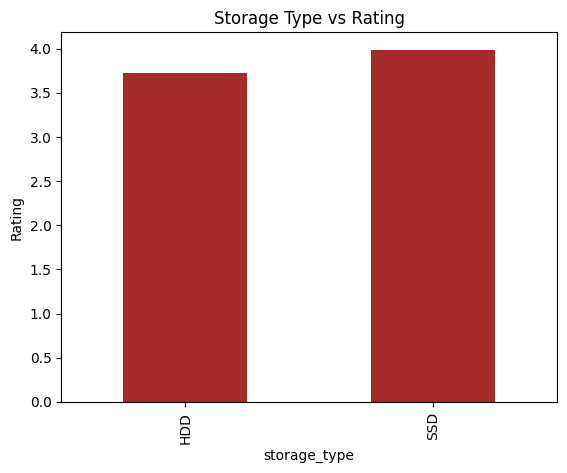

In [71]:
df['storage_type'] = df['storage'].apply(lambda x: 'SSD' if x >= 256 else 'HDD')

df.groupby('storage_type')['rating'].mean().plot(kind='bar', color='brown')
plt.title('Storage Type vs Rating')
plt.ylabel('Rating')
plt.show()


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             100 non-null    object 
 1   model             100 non-null    object 
 2   screen_size       100 non-null    float64
 3   ram               100 non-null    int64  
 4   storage           100 non-null    int64  
 5   cpu_model         100 non-null    object 
 6   operating_system  100 non-null    object 
 7   price             100 non-null    float64
 8   rating            100 non-null    float64
 9   review_count      100 non-null    int64  
 10  graphic           100 non-null    object 
 11  screen_category   100 non-null    object 
 12  price_category    100 non-null    object 
 13  storage_type      100 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 11.1+ KB


In [ ]:
df['screen_category'] = df['screen_size'].apply(lambda x: 'Large (≥15")' if x >= 15 else 'Small (<15")')
df.groupby('screen_category')['rating'].mean().plot(kind='bar', color='green')
plt.title('Screen Size vs Rating')
plt.ylabel('Rating')
plt.show()
